In [2]:
import os
import pandas as pd

# Directory where files are stored
directory = "/Users/HiteshVijan/Downloads"

# List to store all individual DataFrames
dfs = []

# Iterate over each year from 2018 to 2023
for year in range(2018, 2024):
    # Construct the filename for each year
    filename = os.path.join(directory, f"Crimes_{year}.csv")
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Print the shape of the merged DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)

# Optionally, you can save the merged DataFrame to a new CSV file
# merged_df.to_csv("/Users/HiteshVijan/Downloads/Crimes1823.csv", index=False)


Shape of the merged DataFrame: (1451921, 22)


In [3]:
# Check the number of missing values in each column
missing_values = merged_df.isnull().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     7476
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       52
Community Area              2
FBI Code                    0
X Coordinate            22589
Y Coordinate            22589
Year                        0
Updated On                  0
Latitude                22589
Longitude               22589
Location                22589
dtype: int64


In [4]:
#Unknown for Location Description
merged_df['Location Description'].fillna('Unknown', inplace=True)
#Median inputs for Ward and Community Area
merged_df['Ward'].fillna(merged_df['Ward'].median(), inplace=True)
merged_df['Community Area'].fillna(merged_df['Community Area'].median(), inplace=True)
#Drop the Co-ordinates 
merged_df.dropna(subset=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'], inplace=True)


missing_values = merged_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)
print("Shape of the merged DataFrame:", merged_df.shape)

merged_df.to_csv("/Users/HiteshVijan/Downloads/Crimes1823_clean.csv", index=False)

Number of missing values in each column:
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64
Shape of the merged DataFrame: (1429332, 22)


In [21]:
# Create a new column Month 
def month(x):
    return x.strftime("%B")
merged_df['Month'] = merged_df['Date'].apply(month)

merged_df.to_csv("/Users/HiteshVijan/Downloads/Crimes1823_Tableau1.csv", index=False)


In [5]:
merged_df.info()
# Continuous/Numeric Variables
cont = df._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

# Categorical/Non-numeric Variables
print("The categorical variables are: ",list(set(df.columns) - set(cont)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429332 entries, 117 to 1451920
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1429332 non-null  int64  
 1   Case Number           1429332 non-null  object 
 2   Date                  1429332 non-null  object 
 3   Block                 1429332 non-null  object 
 4   IUCR                  1429332 non-null  object 
 5   Primary Type          1429332 non-null  object 
 6   Description           1429332 non-null  object 
 7   Location Description  1429332 non-null  object 
 8   Arrest                1429332 non-null  bool   
 9   Domestic              1429332 non-null  bool   
 10  Beat                  1429332 non-null  int64  
 11  District              1429332 non-null  int64  
 12  Ward                  1429332 non-null  float64
 13  Community Area        1429332 non-null  float64
 14  FBI Code              1429332 no

Top Crimes in Chicago

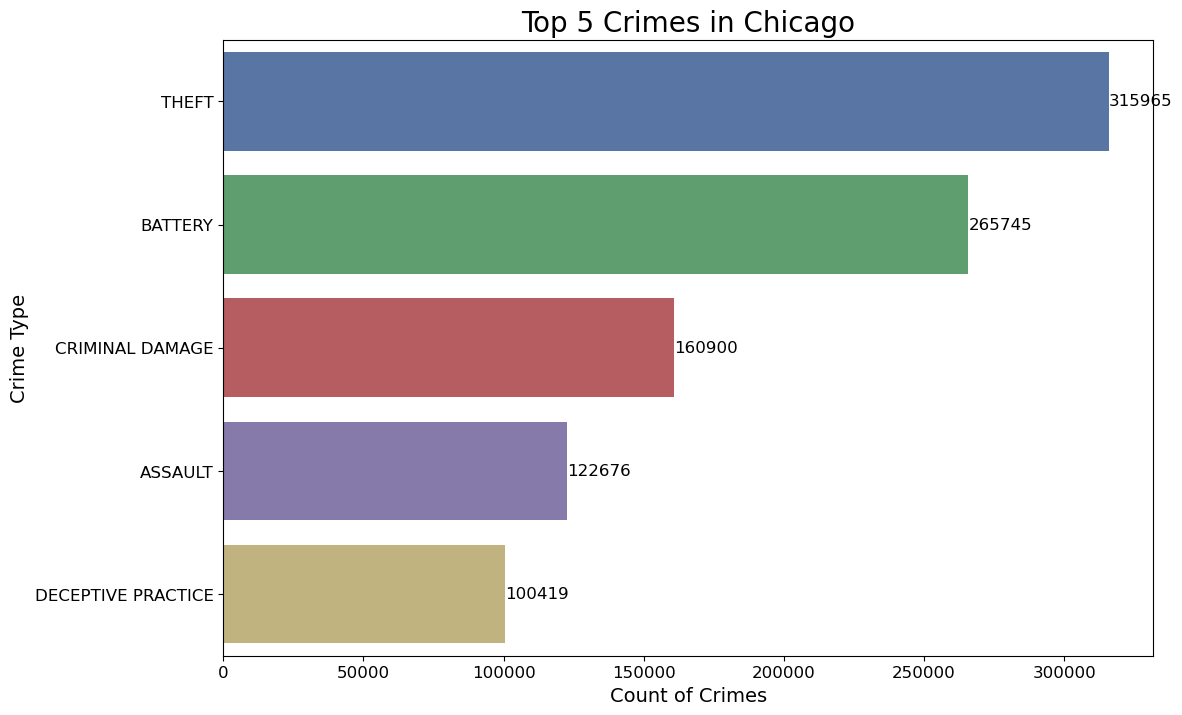

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

# Filter out the Top 5 crimes
top_5_crimes = merged_df['Primary Type'].value_counts().sort_values(ascending=False).head()

# Group by 'Primary Type' and count the number of occurrences
crime_counts = merged_df['Primary Type'].value_counts().head()

# Create a barplot with the custom color palette
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette=custom_palette)

# Add data labels on top of each bar
for i, count in enumerate(crime_counts.values):
    plt.text(count + 50, i, f'{count}', va='center', fontsize=12)

# Set plot title and axis labels
plt.title("Top 5 Crimes in Chicago", fontsize=20)
plt.xlabel("Count of Crimes", fontsize=14)
plt.ylabel("Crime Type", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [7]:
#Converted date and time to get Months seperated

from datetime import datetime

# Time Conversion Function
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

# Using apply() of pandas to apply time_convert on every row of the Date column
merged_df['Date'] = merged_df['Date'].apply(time_convert)

In [17]:
# Create a new column Month 
def month(x):
    return x.strftime("%B")
merged_df['Month'] = merged_df['Date'].apply(month)

merged_df.to_csv("/Users/HiteshVijan/Downloads/Crimes1823_Tableau.csv", index=False)



In [19]:
print(merged_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month'],
      dtype='object')


In [9]:
# Frequency of the most occuring crimes over the year 2018

theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
dec_prac = {}

months = merged_df["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    dec_prac[month]=0

for elem in merged_df[merged_df["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in merged_df[merged_df["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1
        
for elem in merged_df[merged_df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1
        
for elem in merged_df[merged_df["Primary Type"]=="ASSAULT"]["Month"]:
    if elem in assault.keys():
        assault[elem] += 1
        
for elem in merged_df[merged_df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in dec_prac.keys():
        dec_prac[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,dec_prac[k]) for k in months]

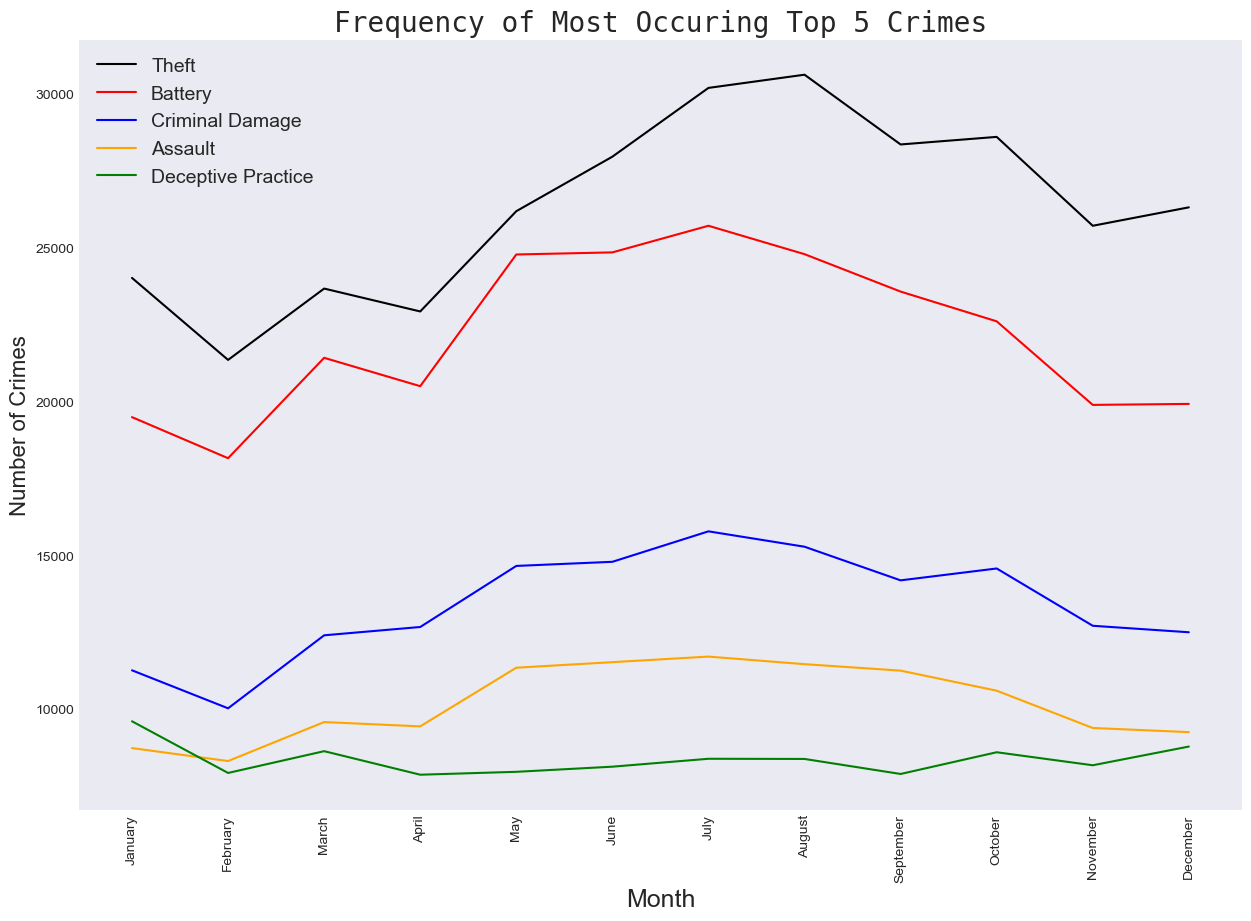

In [10]:
import matplotlib.pyplot as plt

# Define the names of crimes
crime_names = ['Theft', 'Battery', 'Criminal Damage', 'Assault', 'Deceptive Practice']

# Plotting the graphs
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(15, 10))

# Loop through each crime list and plot it
for crime_name, crime_list, color in zip(crime_names, [theft_list, battery_list, crim_dam_list, assault_list, dec_prac_list], ['black', 'red', 'blue', 'orange', 'green']):
    x = [z[0] for z in crime_list]
    y = [z[1] for z in crime_list]
    ax.plot(x, y, color=color, linestyle='-', label=crime_name)

# Customize the plot
ax.set_title("Frequency of Most Occuring Top 5 Crimes", fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes", fontsize=16)
ax.tick_params(axis='x', rotation=90)
ax.legend(fontsize=14)

plt.show()


In [11]:
# df['Arrest'].head()
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 88.17817054429928 !


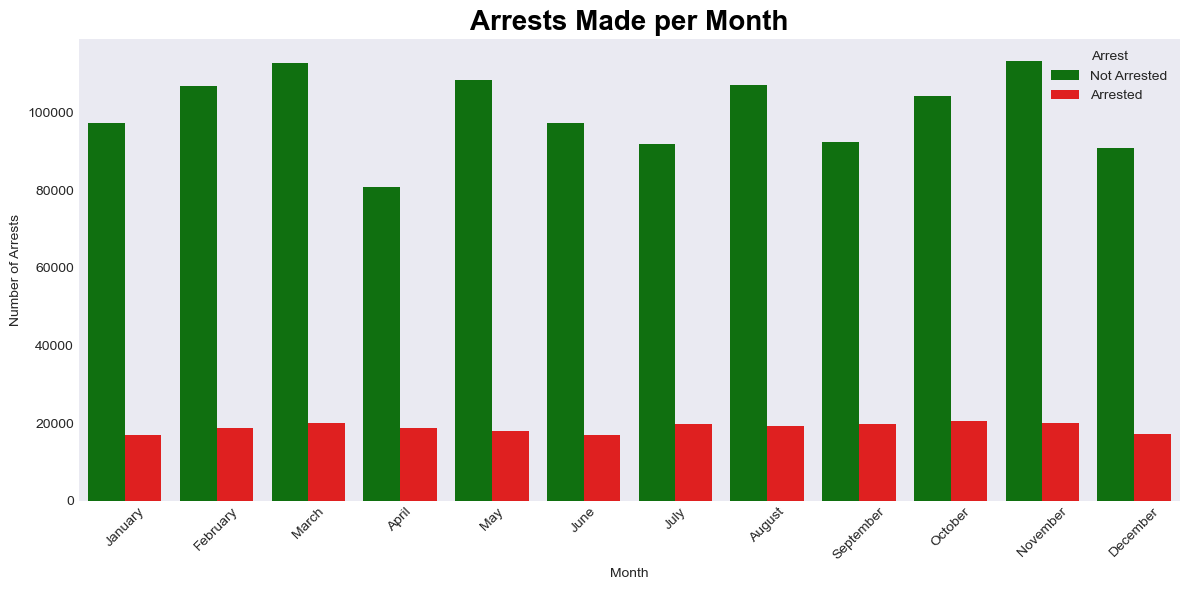

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorder the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

# Set a custom color palette
colors = {'True': 'Green', 'False': 'Red'}

# Plotting the arrests spread out across the months
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Month", hue='Arrest', data=merged_df[['Month', 'Arrest']], palette=colors.values())

# Customize the plot
ax.set(title='Arrests Made per Month', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.legend(title='Arrest', loc='upper right', labels=['Not Arrested', 'Arrested'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# let's look at the pandas groupby function
#arrest_crime = df.groupby(['Primary Type', 'Arrest'])['ID'].count()
arrest_crime = merged_df.groupby(['Primary Type', 'Arrest']).agg({'Arrest':"count"})
arrest_crime.columns = ["Count"]
# arrest_crime

In [14]:
import math

the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS',
           'HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
# the_crimes has only the crimes we want to analyze now

# create the dataframe arrest
arrest = pd.DataFrame(columns=['Crime','True','False'])

# First, we make our dataset
for i,crime in enumerate(the_crimes):
    subset = merged_df[merged_df['Primary Type']==crime]
    true = subset['Arrest'].value_counts().sort_index()[1]
    false = subset['Arrest'].value_counts().sort_index()[0]
    temp_df = pd.DataFrame({'Crime':[crime], 'True':[true], 'False':[false]})
    
    arrest = arrest.append(temp_df)
    
    arrest['True_per']=arrest['True']/(arrest['True']+arrest['False'])*100
    arrest['False_per']=arrest['False']/(arrest['True']+arrest['False'])*100
    
# arrest is our dataset

# plot the dataset
def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
#status = ['Arrested', 'Not Arrested']
status = ['Arrested','Not Arrested']

arrest_cds = ColumnDataSource(arrest)
crimes = arrest_cds.data['Crime'].tolist()
fig2 = figure(x_range=crimes, plot_width = 700, plot_height = 700, 
                title = 'Arrests vs Crime Type',
                x_axis_label = 'Arrest Status', y_axis_label = 'Number of Crimes')
fig2.vbar_stack(stackers = ['True','False'], x='Crime',width=0.25, legend=['Arrested', 'Not Arrested'], source=arrest_cds,
               color=['green','red'])
fig2.xaxis.major_label_orientation = math.pi/2

tooltips = [('Crime','@Crime'),('Arrested Percentage','@True_per'), ('Not Arrested Percentage', '@False_per')]
hover = HoverTool(tooltips=tooltips, mode='vline')

fig2.add_tools(hover)
    
# fig2=style(fig2)

output_notebook()
show(fig2)

/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_19571/3378421163.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_19571/3378421163.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_19571/3378421163.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_19571/3378421163.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrest = arrest.append(temp_df)


NameError: name 'ColumnDataSource' is not defined

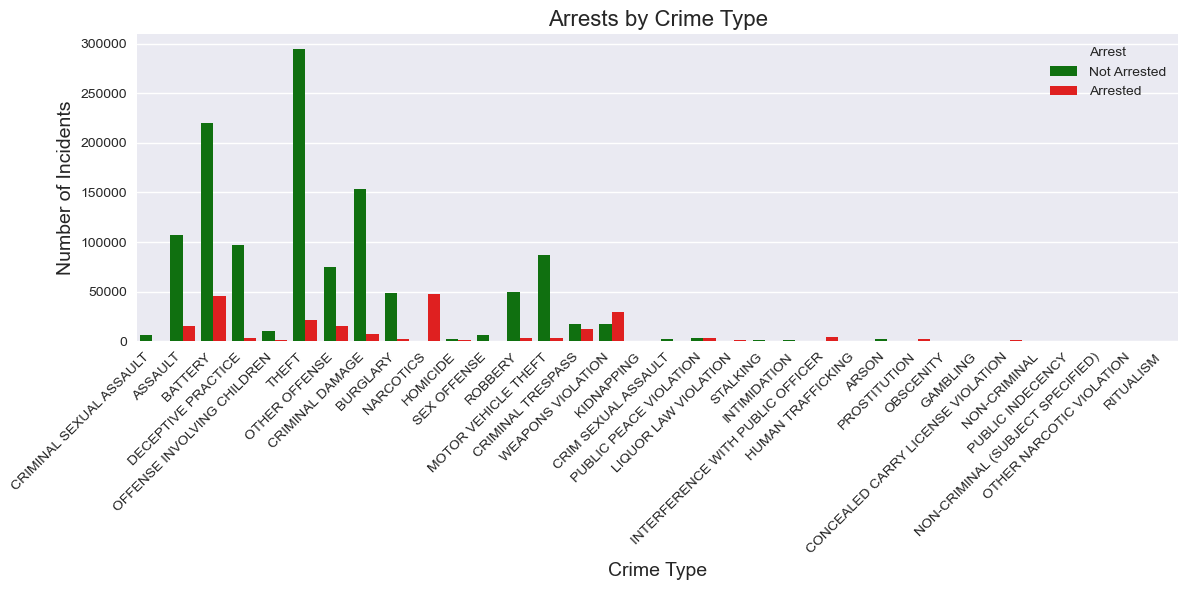

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for 'Arrest' and 'Not Arrested'
colors = {'True': 'Green', 'False': 'Red'}

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a grouped bar chart for each crime type
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Primary Type", hue='Arrest', data=merged_df, palette=colors.values())

# Customize the plot
ax.set_title('Arrests by Crime Type', fontsize=16)
ax.set_xlabel('Crime Type', fontsize=14)
ax.set_ylabel('Number of Incidents', fontsize=14)
ax.legend(title='Arrest', loc='upper right', labels=['Not Arrested', 'Arrested'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


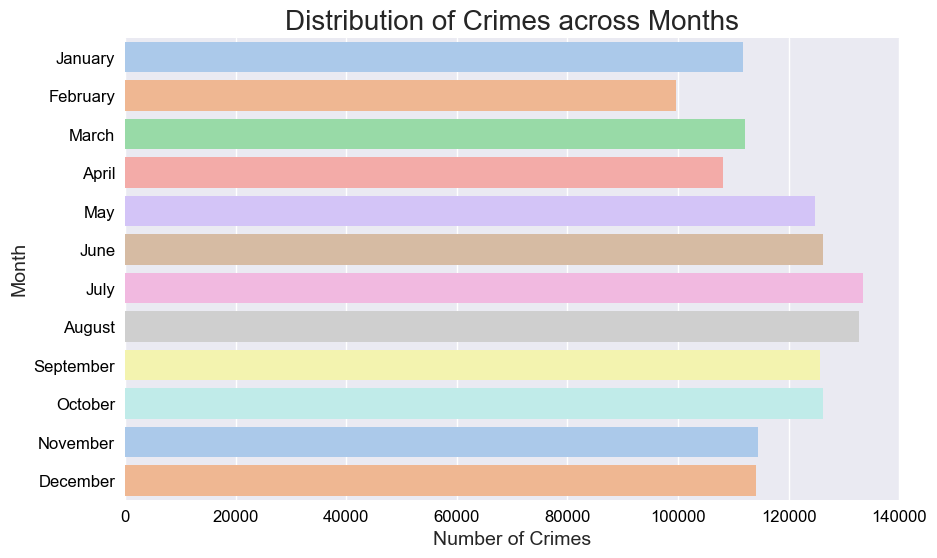

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette("pastel")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Month', data=merged_df, palette=colors, order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'])

# Set title and labels
plt.title("Distribution of Crimes across Months", fontsize=20)
plt.xlabel("Number of Crimes", fontsize=14)
plt.ylabel("Month", fontsize=14)

# Adjust tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.show()


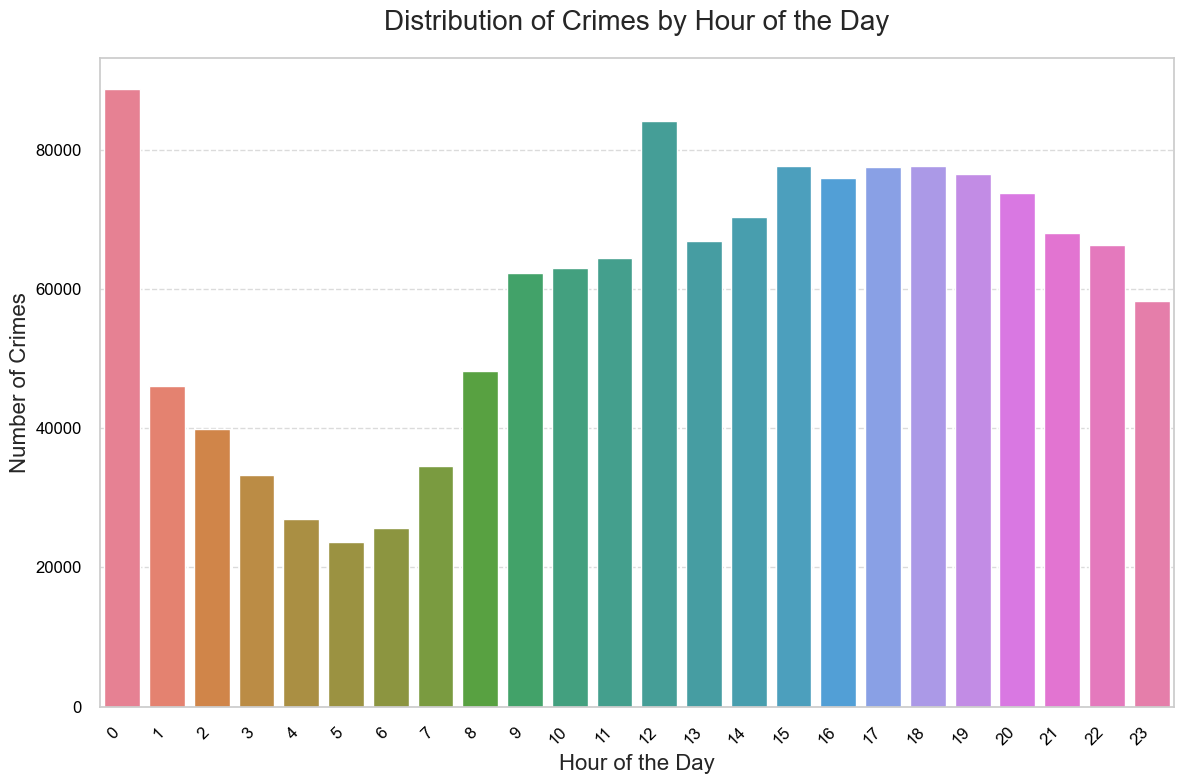

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Date' column contains datetime objects
merged_df['Hour_Day'] = merged_df['Date'].dt.hour

# Define a custom color palette with visually appealing colors
colors = sns.color_palette("husl", 24)  # Choose a color palette with 24 colors for each hour

# Create the count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Hour_Day', data=merged_df, palette=colors, order=sorted(merged_df['Hour_Day'].unique()))

# Set title and labels
plt.title("Distribution of Crimes by Hour of the Day", fontsize=20, pad=20)  # Increase pad for better spacing
plt.xlabel("Hour of the Day", fontsize=16)  # Increase font size
plt.ylabel("Number of Crimes", fontsize=16)  # Increase font size

# Adjust tick labels and gridlines
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove legend
plt.legend([])

# Show plot
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


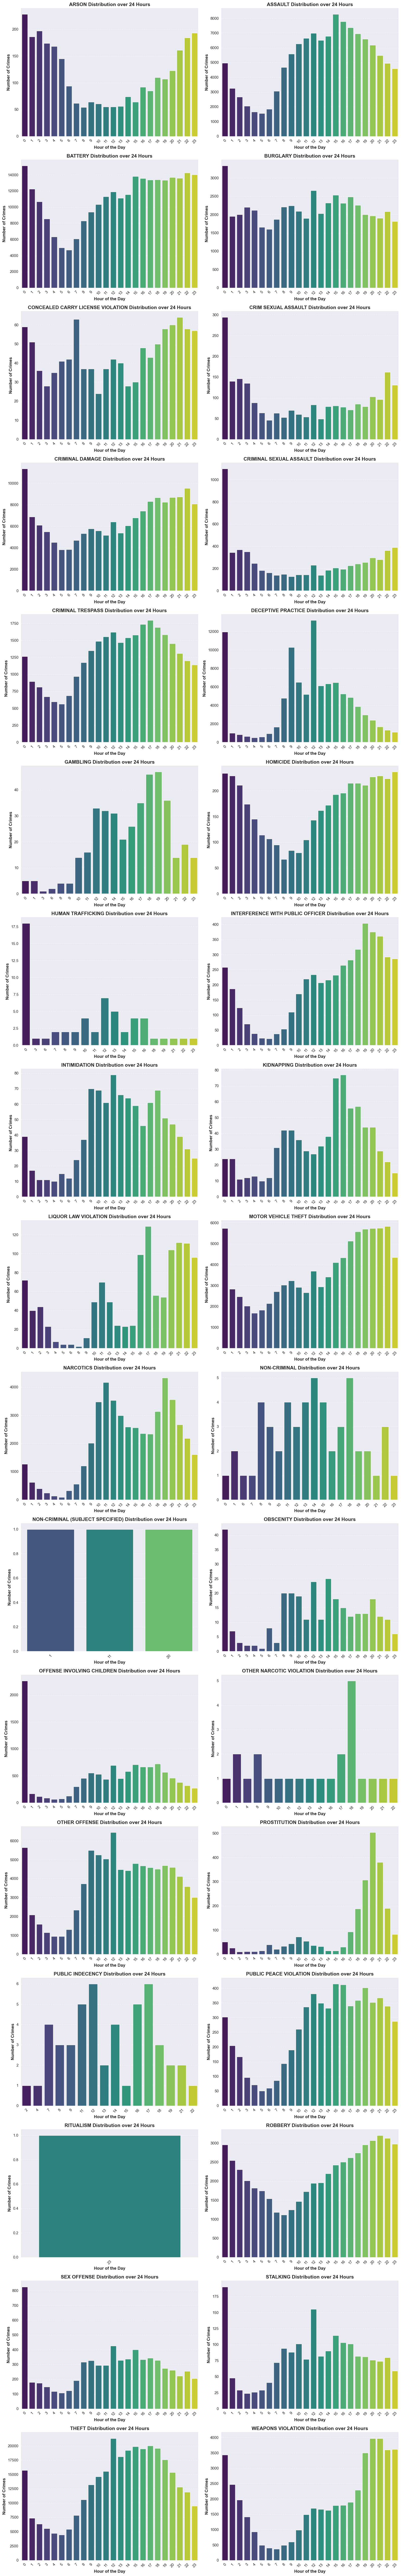

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and color palette
plt.style.use('seaborn-darkgrid')
sns.set_palette('viridis')

# Group data by crime type
crime_groups = merged_df.groupby('Primary Type')

# Define the number of rows and columns for subplots
num_rows = (len(crime_groups) + 1) // 2  # Calculate number of rows
num_cols = 2  # Fixed number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over each crime type and plot its 24-hour pattern
for idx, (crime, group) in enumerate(crime_groups):
    # Extract unique hours and sort them
    hours = sorted(group['Hour_Day'].unique())
    
    # Count the occurrences of each hour
    h_cri = group['Hour_Day'].value_counts().sort_index()
    
    # Plot the 24-hour pattern for the current crime
    sns.barplot(x=hours, y=h_cri, palette='viridis', ax=axes[idx])
    
    # Set plot title and labels
    axes[idx].set_title(f"{crime} Distribution over 24 Hours", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    axes[idx].set_xlabel("Hour of the Day", fontdict={'fontsize': 12, 'fontweight': 'bold'})
    axes[idx].set_ylabel("Number of Crimes", fontdict={'fontsize': 12, 'fontweight': 'bold'})
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and padding
plt.tight_layout()

# Show plot
plt.show()


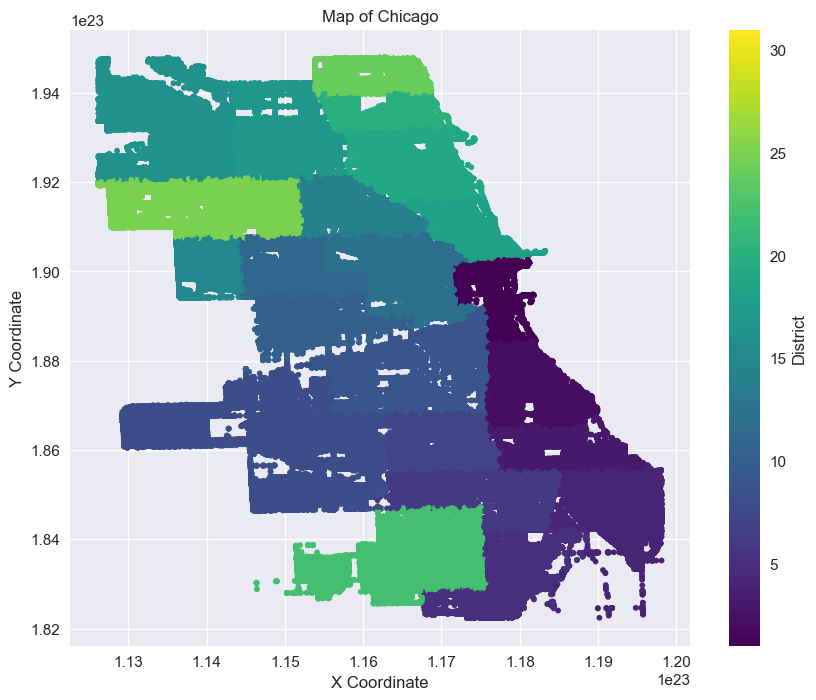

In [ ]:
import matplotlib.pyplot as plt

# Define valid ranges for X and Y coordinates (adjust these as needed)
x_min, x_max = merged_df['X Coordinate'].quantile(0.01), merged_df['X Coordinate'].quantile(0.99)
y_min, y_max = merged_df['Y Coordinate'].quantile(0.01), merged_df['Y Coordinate'].quantile(0.99)

# Filter the data to exclude outliers
filtered_df = merged_df[(merged_df['X Coordinate'] >= x_min) & (merged_df['X Coordinate'] <= x_max) &
                        (merged_df['Y Coordinate'] >= y_min) & (merged_df['Y Coordinate'] <= y_max)]

# Create a scatter plot with the filtered data
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['X Coordinate'], filtered_df['Y Coordinate'], c=filtered_df['District'], cmap='viridis', s=10)
plt.colorbar(label='District')
plt.title('Map of Chicago')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# Show the plot
plt.show()


<Figure size 2000x1000 with 0 Axes>

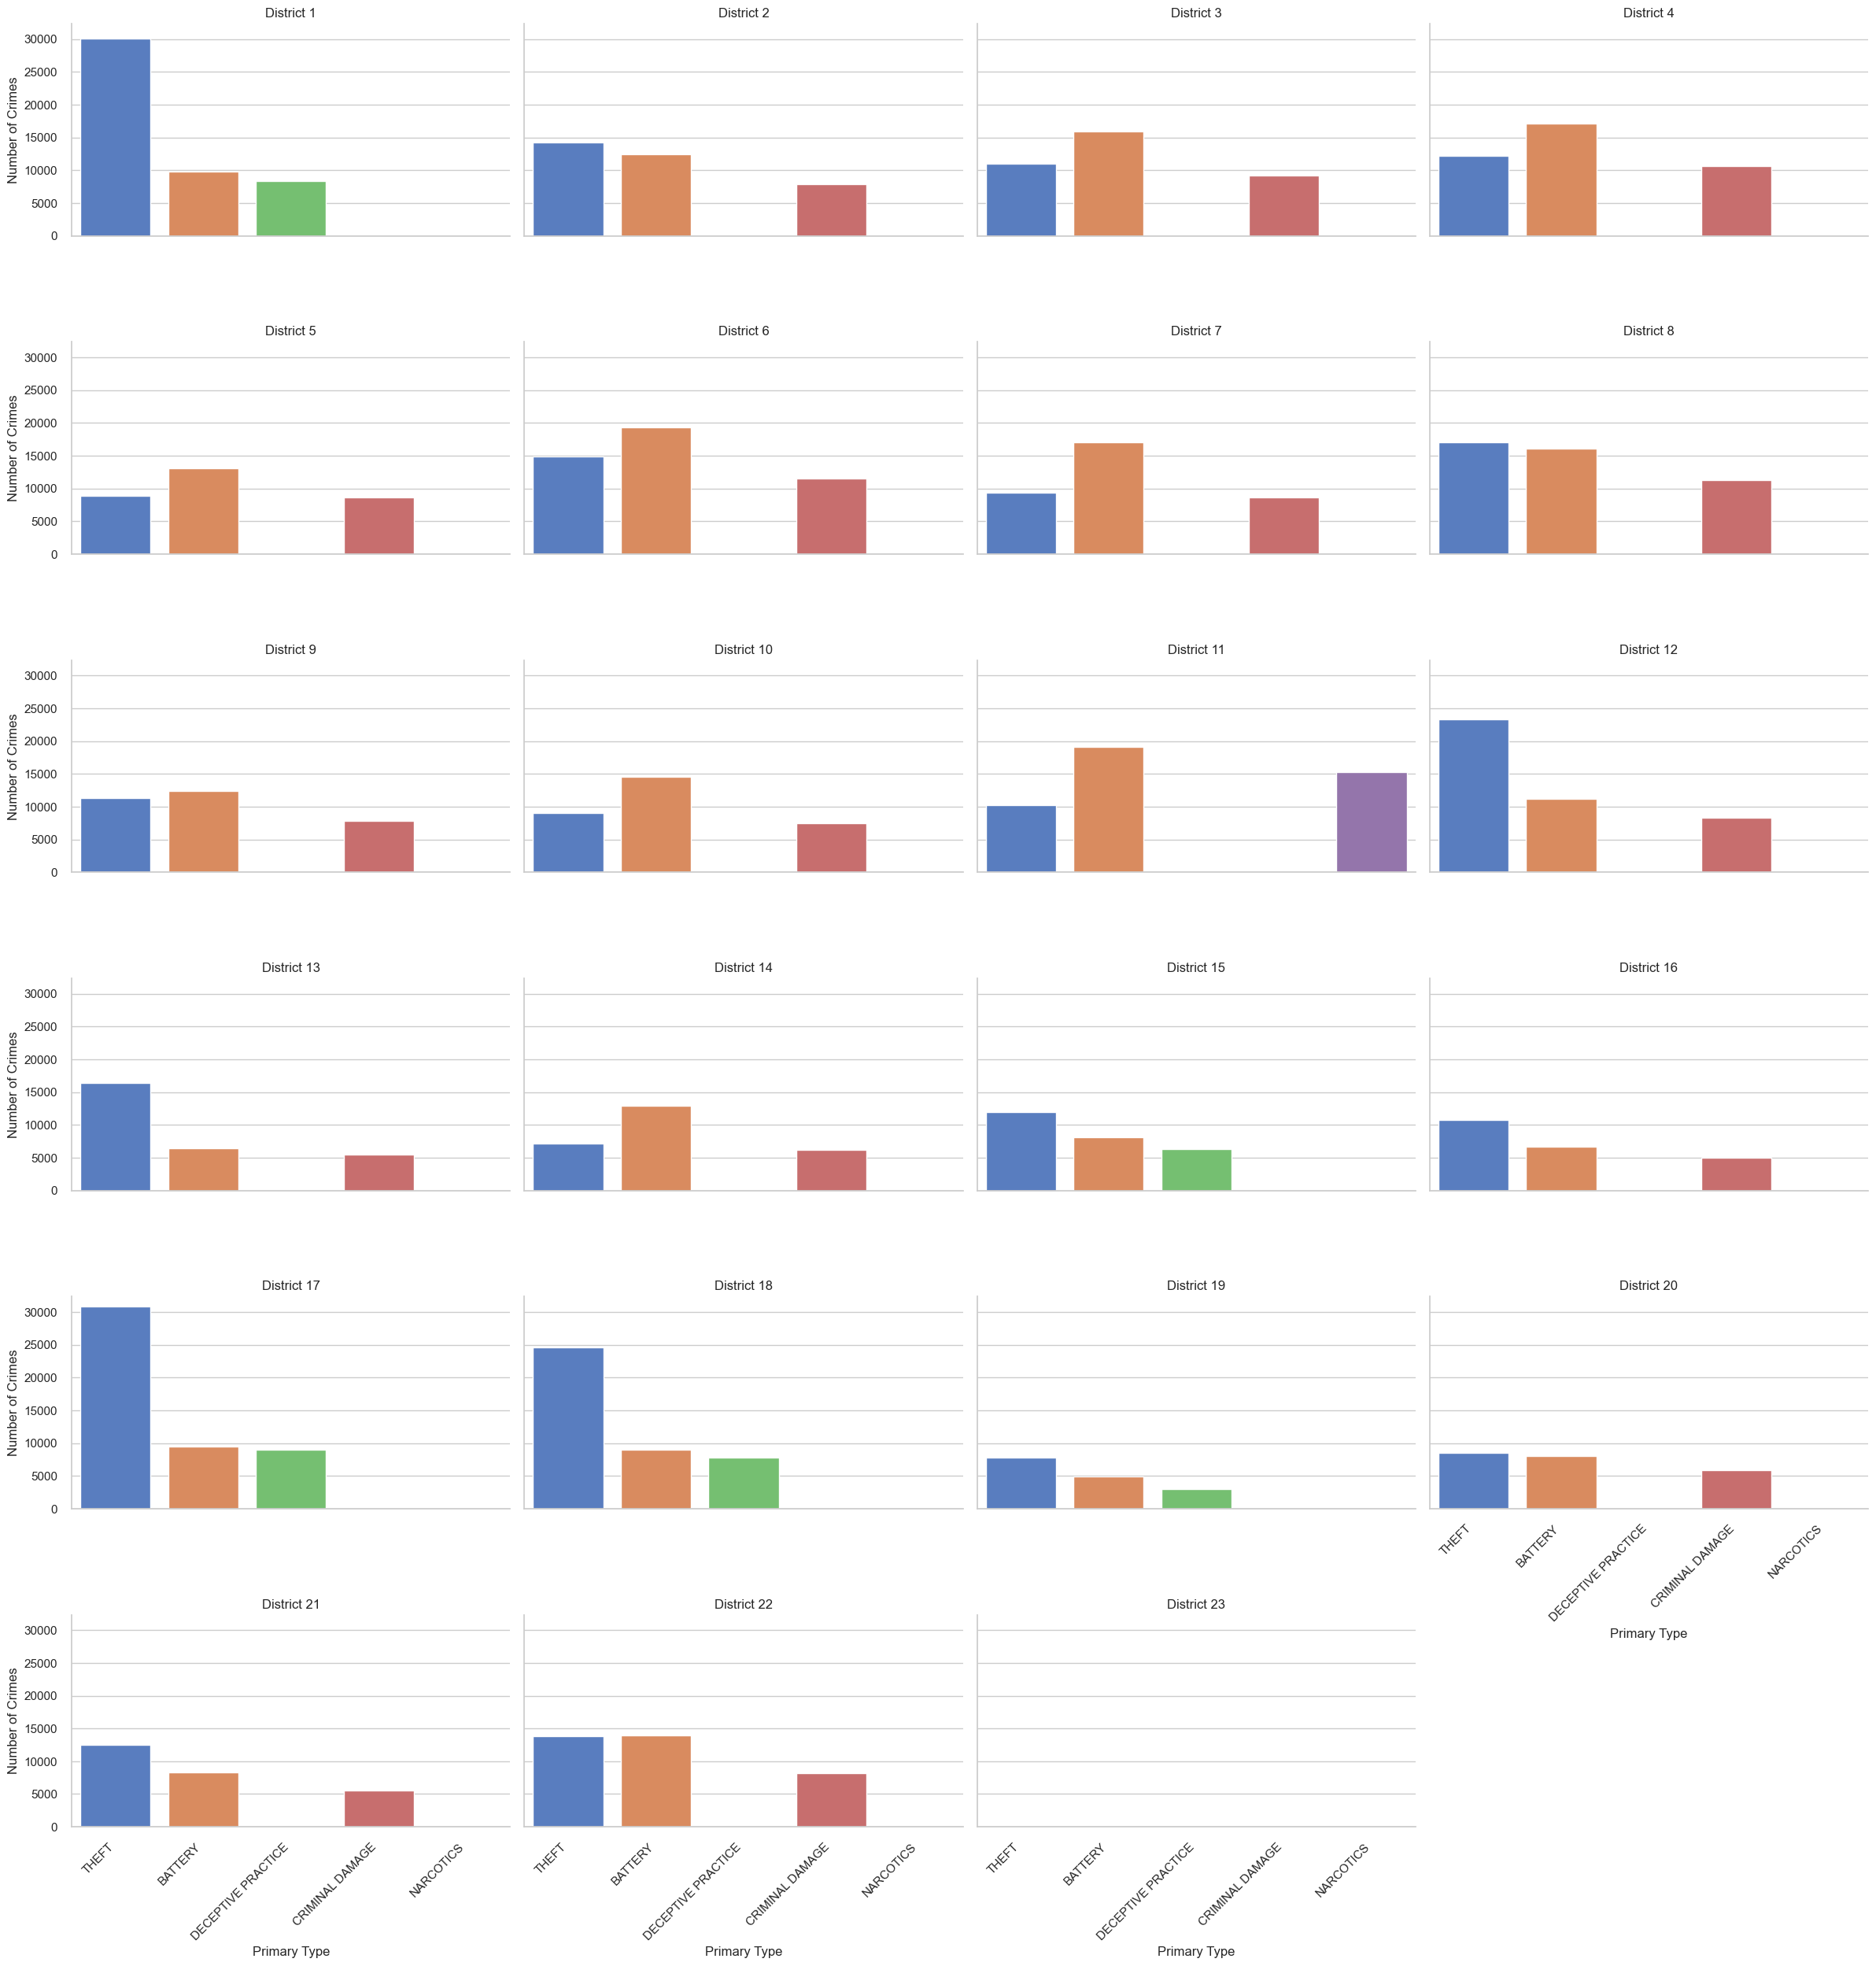

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate top 3 crimes for each district
top = merged_df.groupby(['District', 'Primary Type']).size().reset_index(name='counts') \
    .groupby('District').apply(lambda x: x.sort_values('counts', ascending=False).head(3))

# Set the size and style of the plot
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Create a factor plot with multiple plots
g = sns.catplot(x='Primary Type', y='counts', col='District', col_wrap=4,
                data=top, kind='bar', palette='muted', aspect=1.5, height=4)

# Set titles and labels
g.set_titles("District {col_name}")
g.set_axis_labels("Primary Type", "Number of Crimes")

# Rotate x-axis labels for better readability
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel("Primary Type", fontsize=12)
    ax.set_ylabel("Number of Crimes", fontsize=12)

# Set titles for each subplot
titles = [f"District {i+1}" for i in range(len(g.axes))]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


In [ ]:
## Crime data distribution of gang based criminal activities
import folium

dp=merged_df[merged_df['Primary Type']=='DECEPTIVE PRACTICE']
battery = merged_df[merged_df['Primary Type']=='BATTERY']
cd = merged_df[merged_df['Primary Type']=='CRIMINAL DAMAGE']
mtheft = merged_df[merged_df['Primary Type']=='MOTOR VEHICLE THEFT']
theft = merged_df[merged_df['Primary Type']=='THEFT']
narcotics= merged_df[merged_df['Primary Type']=='NARCOTICS']
merge = cd.append(battery)
merge = merge.append(mtheft)
#merge = merge.append(cd)
merge = merge.append(dp)
merge = merge.append(theft)
merge = merge.append(narcotics)
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="openstreetmap")
locations = merge.groupby('Primary Type').nth(7)


new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]


print(new_locations.head(6))


popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""


for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)


#chicago_map.save('map.html')
display(chicago_map)

#chicago_map._build_map()

/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_14840/3310289015.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge = cd.append(battery)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_14840/3310289015.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge = merge.append(mtheft)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_14840/3310289015.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge = merge.append(dp)
/var/folders/c7/q1n0g2nx6pl51rjnm6hndz240000gn/T/ipykernel_14840/3310289015.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge = merge.append(theft)
/var/folders/c7/q1n

                      Latitude  Longitude Location Description  Arrest
Primary Type                                                          
BATTERY              41.687782 -87.620980             SIDEWALK   False
CRIMINAL DAMAGE      41.882140 -87.682402            APARTMENT   False
DECEPTIVE PRACTICE   41.769035 -87.581302            APARTMENT   False
MOTOR VEHICLE THEFT  41.656658 -87.605130               STREET   False
NARCOTICS            41.868289 -87.699996             SIDEWALK    True
THEFT                42.017185 -87.664147      OTHER (SPECIFY)   False


<Figure size 1000x800 with 0 Axes>

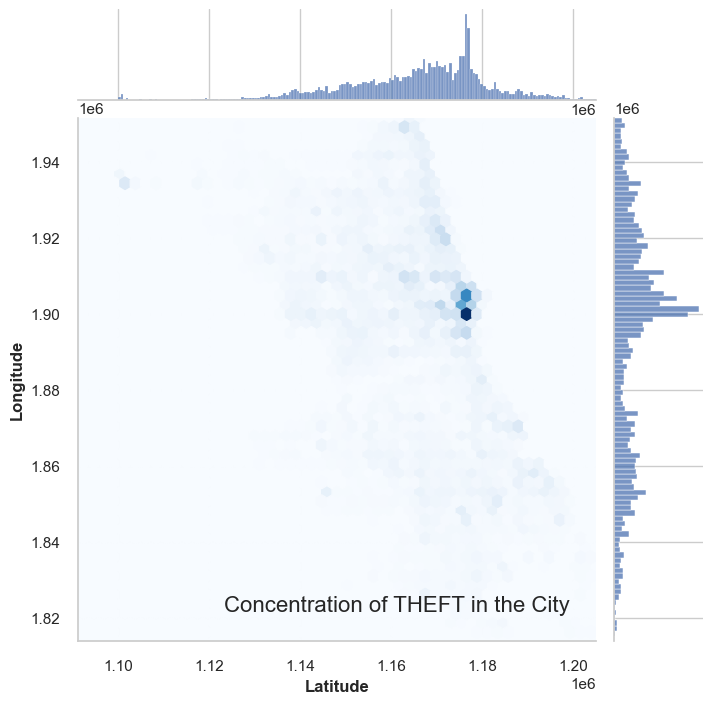

<Figure size 1000x800 with 0 Axes>

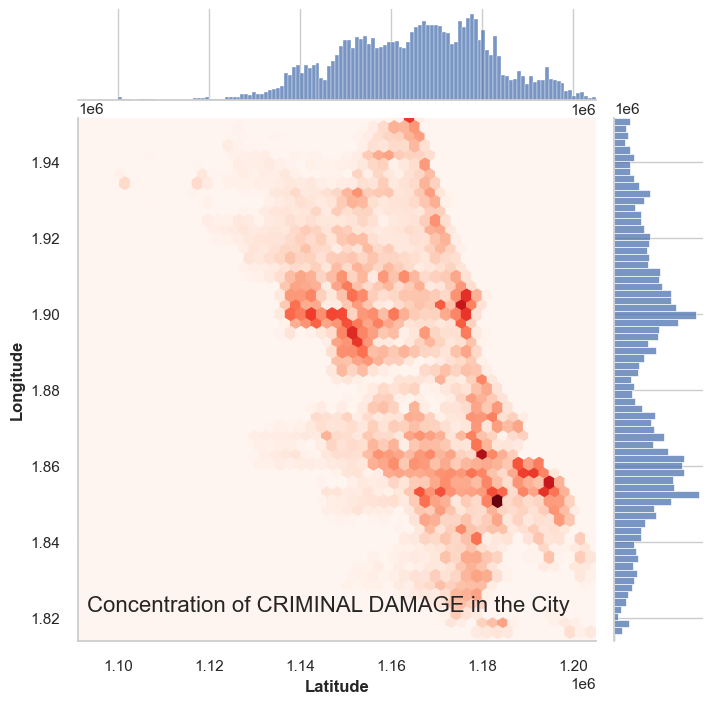

<Figure size 1000x800 with 0 Axes>

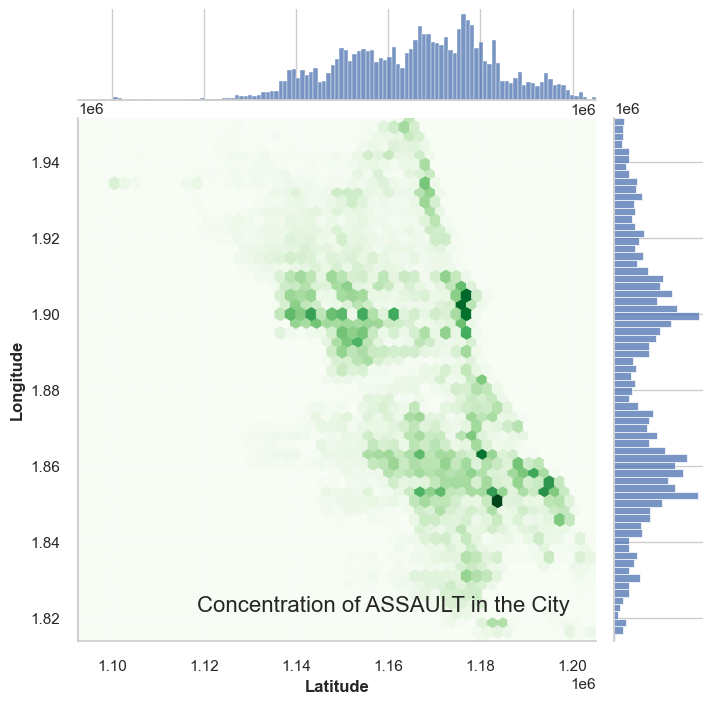

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary mapping crime types to colors
crime_colors = {
    'THEFT': 'Blues',
    'CRIMINAL DAMAGE': 'Reds',
    'ASSAULT': 'Greens'
}

# Define the crime types of interest
crime_types_of_interest = ['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT']

# Loop through each crime type
for crime_type in crime_types_of_interest:
    # Filter the dataframe for the current crime type
    crime_df = merged_df[merged_df['Primary Type'] == crime_type]

    # Calculate the 99th percentile for X and Y coordinates to remove outliers
    x_percentile = crime_df['X Coordinate'].quantile(0.99)
    y_percentile = crime_df['Y Coordinate'].quantile(0.99)


    # Create a joint plot for the current crime type with custom color
    plt.figure(figsize=(10, 8))
    sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex', cmap=crime_colors[crime_type])
    
    # Add text annotation at the end of the plot
    plt.text(0.95, 0.05, f'Concentration of {crime_type} in the City', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=16)
    
    plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
    plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
    plt.xlim(crime_df['X Coordinate'].min(), crime_df['X Coordinate'].max())
    plt.ylim(crime_df['Y Coordinate'].min(), crime_df['Y Coordinate'].max())
    plt.show()
